In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
# from sklearn.model_selection import linear_model

# Regression Analysis

In [2]:
from sklearn.linear_model import LinearRegression

# Data Explortion

Correlation

Scatter plot 



In [3]:
df_cur=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\Data_Science_Reg_Class.xlsx",sheet_name='Curveture')

In [4]:
# Checking the correlation 
df_cur.corr()

,Age,Weight
Age,1.00000,-0.10055
Weight,-0.10055,1.00000


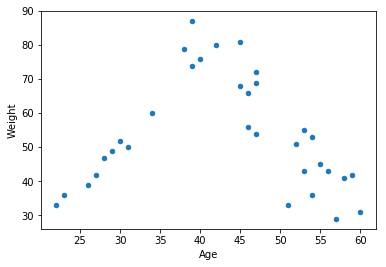

In [5]:
# checking scatter plot
df_cur.plot.scatter(x='Age',y='Weight')

In [6]:
df_simple_re=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\Data_Science_Reg_Class.xlsx",sheet_name='Simple_Reg_ex')

In [7]:
#Check the correlation
df_simple_re.corr()

,Age,Weight,Height
Age,1.000000,0.750420,0.702931
Weight,0.750420,1.000000,0.762155
Height,0.702931,0.762155,1.000000


In [8]:
# df_simple_re.hist()

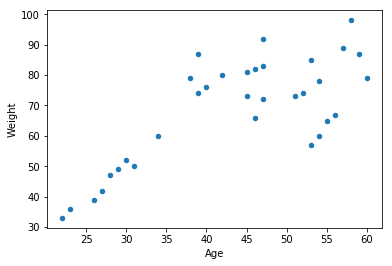

In [9]:
#Check the scatter plot
df_simple_re.plot.scatter(x='Age',y='Weight')

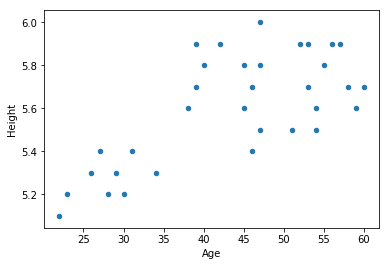

In [10]:
df_simple_re.plot.scatter(x='Age',y='Height')

In [11]:
df_outlier=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\Data_Science_Reg_Class.xlsx",sheet_name='Outlier')

In [12]:
#check the correlation
df_outlier.corr()

,Age,Weight
Age,1.00000,0.48814
Weight,0.48814,1.00000


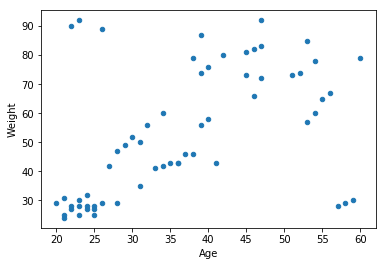

In [13]:
#check the scatterplot
df_outlier.plot.scatter(x='Age',y='Weight')

# Splitting

Train data size

Test data size

Shuffle

Random State

Stratify


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# syntax: 
# sklearn.model_selection.train_test_split(test_size,train_size,random_state,shuffle,stratify)

One Variable split

In [16]:
df_simple_re.columns

Index(['Age', 'Weight', 'Height'], dtype='object')

In [17]:
train,test=train_test_split(df_simple_re.Age,test_size=.30)

In [18]:
train,test=train_test_split(df_simple_re.Age,test_size=.30,shuffle=True,random_state=5)

In [19]:
df_simple_re.shape

(33, 3)

In [20]:
df_simple_re['Age'][:5]

0    22
1    23
2    26
3    27
4    28
Name: Age, dtype: int64

In [21]:
train[:5]

24    60
1     23
32    51
19    47
11    38
Name: Age, dtype: int64

In [22]:
train.shape


(23,)

In [23]:
test.shape

(10,)

In [24]:
Age_train,Age_test, Weight_train, Weight_test=train_test_split(df_simple_re.Age,df_simple_re.Weight,test_size=.30,shuffle=True)

In [25]:
Age_train

10    47
17    47
20    56
12    39
19    47
4     28
2     26
3     27
9     46
32    51
30    59
22    53
8     34
6     31
31    53
5     29
29    58
23    45
26    54
1     23
18    39
25    52
7     30
Name: Age, dtype: int64

In [26]:
Weight_train

10    72
17    83
20    67
12    74
19    92
4     47
2     39
3     42
9     66
32    73
30    87
22    57
8     60
6     50
31    85
5     49
29    98
23    73
26    78
1     36
18    87
25    74
7     52
Name: Weight, dtype: int64

Shuffle off

random state

# Model Building

Simple Linear Regression


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
df_simple_re.columns

Index(['Age', 'Weight', 'Height'], dtype='object')

In [29]:
#depends age and weight predict height

In [30]:
X=df_simple_re[['Age','Height']].to_numpy()

In [31]:
# X

In [32]:
y=df_simple_re['Weight'].to_numpy()

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [34]:
reg=LinearRegression().fit(X_train,y_train)

In [35]:
reg_1=LinearRegression()

In [36]:
reg2=reg_1.fit(X_train,y_train)

In [37]:
reg2.score(X_train,y_train)

0.7154938320858693

In [38]:
# >80-< 95

In [39]:
# Linear Regression
# Syntax:
    
# LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [40]:
# Return :
# coef_: estimated coefficients
# intercept_: regression line point value at y-axis
    

Coefficients: slop of the variables/unit change happening in the dependent variables interms of independent variables
coef_


In [43]:
reg2.coef_

array([ 0.6730792 , 33.70662736])

Intercept: starting point value of the regression line/Constant increment or decrement in the regression

intercept_

In [44]:
reg2.intercept_

-149.08800040196294

Model equation

In [ ]:
Weight=-149.08800040196294+0.6730792*Age+33.70662736*Height

Predictions
predict()

In [45]:
reg2.predict([[30,5.6]])

array([59.86148894])

In [50]:
pred=reg2.predict(X_test)

In [49]:
X_test_new=pd.DataFrame(X_test,columns=["Age","Height"])

In [51]:
X_test_new['pred_weight']=pred

In [54]:
X_test_new['actual_weight']=y_test

In [55]:
X_test_new

,Age,Height,pred_weight,actual_weight
0,38.0,5.6,65.246123,79
1,56.0,5.9,87.473536,67
2,60.0,5.7,83.424528,79
3,47.0,5.8,78.045161,83
4,26.0,5.3,47.057184,39
5,52.0,5.9,84.781220,74
6,54.0,5.6,76.015390,78
7,46.0,5.7,74.001419,82
8,47.0,5.5,67.933173,72
9,51.0,5.5,70.625489,73


random_state: importance

In [61]:
# Without random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.35)
reg=LinearRegression().fit(X_train,y_train)
reg_1=LinearRegression()
reg2=reg_1.fit(X_train,y_train)
reg2.score(X_train,y_train)

0.627032527235361

In [ ]:
Gridsearch()

In [66]:
# With random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.350,random_state=0)
reg=LinearRegression().fit(X_train,y_train)
reg_1=LinearRegression()
reg2=reg_1.fit(X_train,y_train)
reg2.score(X_train,y_train)

0.7165895961303927